<a href="https://colab.research.google.com/github/uichann/My_Repository/blob/main/RNN_LSTM_%EC%8B%A4%EC%8A%B5(%EC%85%80%ED%8A%B8%EB%A6%AC%EC%98%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import os

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,20)

plt.rcParams['font.family'] = 'NanumGothic'

In [4]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import FinanceDataReader as fdr

In [7]:
cell  = fdr.DataReader('068270')

In [8]:
cell.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-10-26,184500,187000,182500,185500,379277,0.005420
2022-10-27,188000,190000,186000,190000,380062,0.024259
2022-10-28,190000,192000,187000,187500,313762,-0.013158
2022-10-31,190000,194000,189500,192000,301684,0.024000
2022-11-01,190500,192000,185000,186000,366987,-0.031250


In [9]:
cell.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2005-07-19,5597,6433,5437,6439,0,NaN
2005-07-20,6424,6424,5470,5475,0,-0.149713
2005-07-21,5391,5499,4785,4798,0,-0.123653
2005-07-22,4884,4884,4617,4664,0,-0.027928
2005-07-25,4587,4967,4587,4723,0,0.012650


In [10]:
fdr.DataReader('F','2005-01-01','2020-01-01')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,14.66,14.75,14.51,14.71,9.027494,9852200
2005-01-04,14.71,14.75,14.59,14.66,8.996808,9035400
2005-01-05,14.63,14.66,14.42,14.43,8.855657,11376200
2005-01-06,14.40,14.52,14.37,14.45,8.867934,6672600
2005-01-07,14.48,14.65,14.45,14.65,8.990672,11452500
...,...,...,...,...,...,...
2019-12-24,9.44,9.49,9.43,9.47,9.066253,11881600
2019-12-26,9.47,9.49,9.43,9.45,9.047104,28961300
2019-12-27,9.45,9.46,9.35,9.36,8.960941,28272800


In [11]:
STOCK_CODE = '068270'

In [12]:
stock = fdr.DataReader(STOCK_CODE)
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2005-07-19,5597,6433,5437,6439,0,NaN
2005-07-20,6424,6424,5470,5475,0,-0.149713
2005-07-21,5391,5499,4785,4798,0,-0.123653
2005-07-22,4884,4884,4617,4664,0,-0.027928
2005-07-25,4587,4967,4587,4723,0,0.012650


In [13]:
stock.describe()

,Open,High,Low,Close,Volume,Change
count,4275.000000,4275.000000,4275.000000,4275.000000,4.275000e+03,4274.000000
mean,87730.178947,89432.097778,86036.251228,87609.835556,2.602343e+05,0.001399
std,94255.152613,96134.184828,92307.252671,93915.483231,6.726202e+05,0.036545
min,0.000000,0.000000,0.000000,1896.000000,0.000000e+00,-0.326942
25%,14147.500000,14420.500000,13792.000000,14216.000000,0.000000e+00,-0.014004
50%,37590.000000,38338.000000,36832.000000,37507.000000,0.000000e+00,0.000000
75%,164642.000000,168583.500000,162403.000000,165148.000000,3.324785e+05,0.013825
max,382155.000000,388902.000000,368055.000000,388903.000000,1.154982e+07,1.067207


In [14]:
stock.index

DatetimeIndex(['2005-07-19', '2005-07-20', '2005-07-21', '2005-07-22',
               '2005-07-25', '2005-07-26', '2005-07-27', '2005-07-28',
               '2005-07-29', '2005-08-01',
               ...
               '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-24',
               '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28',
               '2022-10-31', '2022-11-01'],
              dtype='datetime64[ns]', name='Date', length=4275, freq=None)

In [15]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [16]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
2005-07-19,5597,6433,5437,6439,0,NaN,2005,7,19
2005-07-20,6424,6424,5470,5475,0,-0.149713,2005,7,20
2005-07-21,5391,5499,4785,4798,0,-0.123653,2005,7,21
2005-07-22,4884,4884,4617,4664,0,-0.027928,2005,7,22
2005-07-25,4587,4967,4587,4723,0,0.012650,2005,7,25


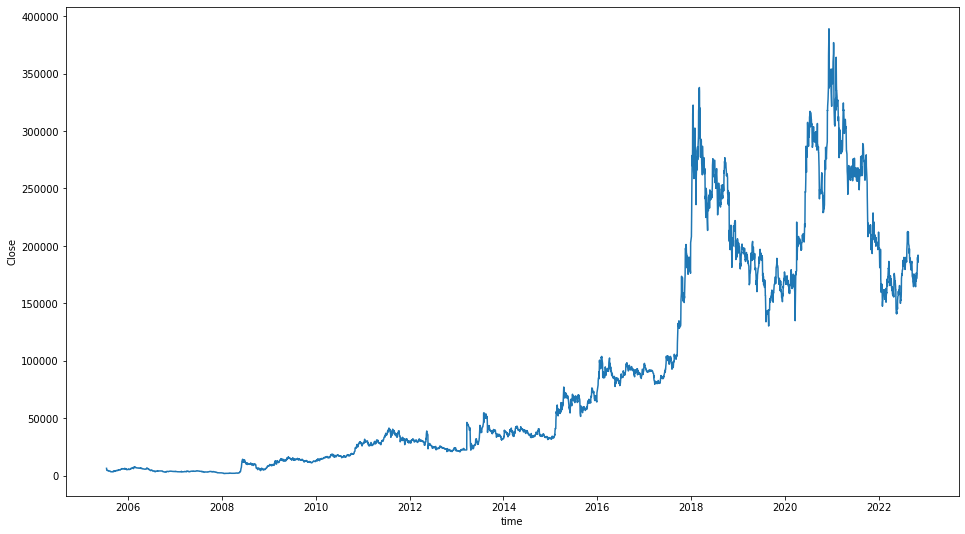

In [17]:
plt.figure(figsize=(16,9))
sns.lineplot(y=stock['Close'],x=stock.index)
plt.xlabel('time')
plt.show()

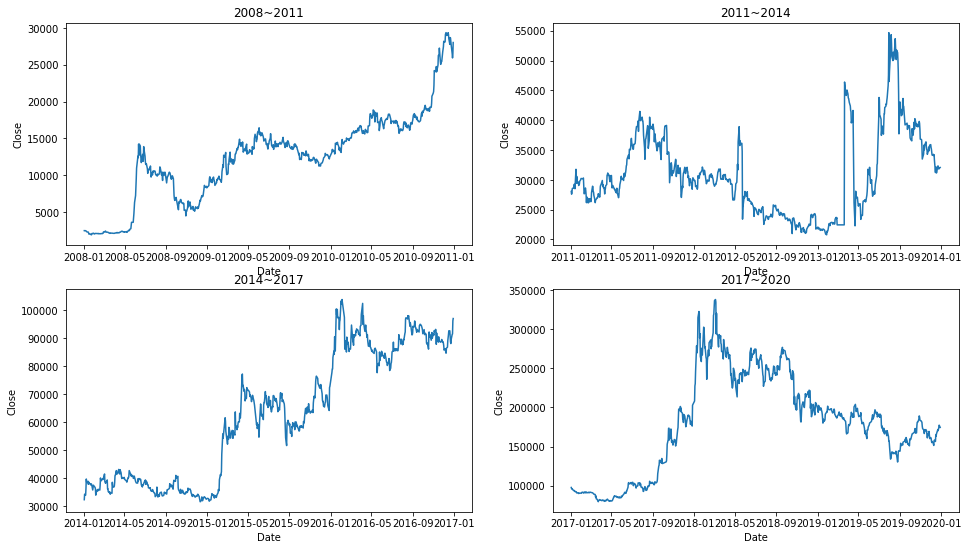

In [24]:
time_steps = [['2008','2011'],['2011','2014'],['2014','2017'],['2017','2020']]
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,9)

for i in range(4):
    ax = axes[i//2,i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x = df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['Open','High','Low','Close','Volume']

scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.01464589, 0.01654144, 0.01477225, 0.01173881, 0.        ],
       [0.01680993, 0.0165183 , 0.01486191, 0.00924789, 0.        ],
       [0.01410684, 0.01413981, 0.01300077, 0.00749857, 0.        ],
       ...,
       [0.49718046, 0.49369764, 0.50807624, 0.47958822, 0.02716596],
       [0.49718046, 0.49884032, 0.5148687 , 0.49121592, 0.02612023],
       [0.49848883, 0.49369764, 0.50264227, 0.47571233, 0.03177426]])

In [26]:
df = pd.DataFrame(scaled, columns=scale_cols)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4275 entries, 0 to 4274
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4275 non-null   float64
 1   High    4275 non-null   float64
 2   Low     4275 non-null   float64
 3   Close   4275 non-null   float64
 4   Volume  4275 non-null   float64
dtypes: float64(5)
memory usage: 167.1 KB


In [27]:
from sklearn.model_selection import train_test_split as tts

In [28]:
x_train, x_test, y_train, y_test = tts(df.drop('Close',1), df['Close'], test_size = 0.2, random_state=0, shuffle = False)

In [29]:
x_train.shape, y_train.shape

((3420, 4), (3420,))

In [30]:
x_test.shape, y_test.shape

((855, 4), (855,))

In [31]:
x_train

,Open,High,Low,Volume
0,0.014646,0.016541,0.014772,0.000000
1,0.016810,0.016518,0.014862,0.000000
2,0.014107,0.014140,0.013001,0.000000
3,0.012780,0.012558,0.012544,0.000000
4,0.012003,0.012772,0.012463,0.000000
...,...,...,...,...
3415,0.503463,0.494729,0.496491,0.065697
3416,0.481786,0.480527,0.483985,0.052101
3417,0.463720,0.472240,0.481485,0.046975
3418,0.475762,0.469874,0.488987,0.033410


In [32]:
import tensorflow as tf

In [38]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [39]:
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [40]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [41]:
for data in train_data.take(1):
    print(f'데이터셋(x) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(x) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Conv1D(filters=32, kernel_size = 5,  
           padding='causal',
           activation='relu',
           input_shape=[WINDOW_SIZE,1]),
    LSTM(16, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(1)


])

In [45]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer = optimizer, metrics = ['mse'])


In [46]:
earlystopping  = EarlyStopping(monitor = 'val_loss', patience=10)
filename = os.path.join('tmp', 'checkpointer.okpt')
checkpoint = ModelCheckpoint(filename,
                             save_weigt_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verboss=1)


In [47]:
history = model.fit(train_data,validation_data=(test_data),
                    epochs=50,
                    callbacks=[checkpoint,earlystopping])

Epoch 1/50
    107/Unknown - 11s 7ms/step - loss: 2.0211e-04 - mse: 4.0423e-04

107/107 [==============================] - 18s 68ms/step - loss: 2.0211e-04 - mse: 4.0423e-04 - val_loss: 0.0011 - val_mse: 0.0022
Epoch 2/50
106/107 [============================>.] - ETA: 0s - loss: 1.3478e-04 - mse: 2.6957e-04

107/107 [==============================] - 5s 48ms/step - loss: 1.3462e-04 - mse: 2.6923e-04 - val_loss: 6.7424e-04 - val_mse: 0.0013
Epoch 3/50
107/107 [==============================] - ETA: 0s - loss: 1.1996e-04 - mse: 2.3992e-04

107/107 [==============================] - 5s 51ms/step - loss: 1.1996e-04 - mse: 2.3992e-04 - val_loss: 6.6015e-04 - val_mse: 0.0013
Epoch 4/50
100/107 [===========================>..] - ETA: 0s - loss: 1.0690e-04 - mse: 2.1380e-04

107/107 [==============================] - 5s 47ms/step - loss: 1.1730e-04 - mse: 2.3460e-04 - val_loss: 5.7608e-04 - val_mse: 0.0012
Epoch 5/50
107/107 [==============================] - 1s 8ms/step - loss: 1.1318e-04 - mse: 2.2636e-04 - val_loss: 7.2437e-04 - val_mse: 0.0014
Epoch 6/50
 98/107 [==========================>...] - ETA: 0s - loss: 9.2266e-05 - mse: 1.8453e-04

107/107 [==============================] - 6s 51ms/step - loss: 9.9180e-05 - mse: 1.9836e-04 - val_loss: 5.2056e-04 - val_mse: 0.0010
Epoch 7/50
 99/107 [==========================>...] - ETA: 0s - loss: 1.0300e-04 - mse: 2.0600e-04

107/107 [==============================] - 5s 47ms/step - loss: 1.1181e-04 - mse: 2.2362e-04 - val_loss: 4.8910e-04 - val_mse: 9.7820e-04
Epoch 8/50
105/107 [============================>.] - ETA: 0s - loss: 8.8106e-05 - mse: 1.7621e-04

107/107 [==============================] - 5s 50ms/step - loss: 9.1773e-05 - mse: 1.8355e-04 - val_loss: 4.5269e-04 - val_mse: 9.0537e-04
Epoch 9/50
107/107 [==============================] - 1s 8ms/step - loss: 9.2584e-05 - mse: 1.8517e-04 - val_loss: 5.4634e-04 - val_mse: 0.0011
Epoch 10/50
107/107 [==============================] - 1s 8ms/step - loss: 9.1367e-05 - mse: 1.8273e-04 - val_loss: 4.9114e-04 - val_mse: 9.8227e-04
Epoch 11/50
101/107 [===========================>..] - ETA: 0s - loss: 7.7419e-05 - mse: 1.5484e-04

107/107 [==============================] - 5s 47ms/step - loss: 8.3266e-05 - mse: 1.6653e-04 - val_loss: 3.9192e-04 - val_mse: 7.8385e-04
Epoch 12/50
107/107 [==============================] - 1s 8ms/step - loss: 8.3000e-05 - mse: 1.6600e-04 - val_loss: 4.4541e-04 - val_mse: 8.9081e-04
Epoch 13/50
107/107 [==============================] - 1s 8ms/step - loss: 8.2154e-05 - mse: 1.6431e-04 - val_loss: 3.9685e-04 - val_mse: 7.9370e-04
Epoch 14/50
107/107 [==============================] - 1s 8ms/step - loss: 7.1280e-05 - mse: 1.4256e-04 - val_loss: 4.8599e-04 - val_mse: 9.7198e-04
Epoch 15/50
105/107 [============================>.] - ETA: 0s - loss: 6.9886e-05 - mse: 1.3977e-04

107/107 [==============================] - 6s 51ms/step - loss: 7.0557e-05 - mse: 1.4111e-04 - val_loss: 3.8571e-04 - val_mse: 7.7143e-04
Epoch 16/50
107/107 [==============================] - 1s 8ms/step - loss: 7.7255e-05 - mse: 1.5451e-04 - val_loss: 5.9725e-04 - val_mse: 0.0012
Epoch 17/50
107/107 [==============================] - 1s 8ms/step - loss: 7.1627e-05 - mse: 1.4325e-04 - val_loss: 4.6604e-04 - val_mse: 9.3208e-04
Epoch 18/50
107/107 [==============================] - 1s 8ms/step - loss: 6.6947e-05 - mse: 1.3389e-04 - val_loss: 5.8119e-04 - val_mse: 0.0012
Epoch 19/50
100/107 [===========================>..] - ETA: 0s - loss: 5.9847e-05 - mse: 1.1969e-04

107/107 [==============================] - 5s 50ms/step - loss: 6.6315e-05 - mse: 1.3263e-04 - val_loss: 3.0930e-04 - val_mse: 6.1861e-04
Epoch 20/50
102/107 [===========================>..] - ETA: 0s - loss: 6.2130e-05 - mse: 1.2426e-04

107/107 [==============================] - 5s 48ms/step - loss: 6.3796e-05 - mse: 1.2759e-04 - val_loss: 2.7476e-04 - val_mse: 5.4951e-04
Epoch 21/50
101/107 [===========================>..] - ETA: 0s - loss: 5.8130e-05 - mse: 1.1626e-04

107/107 [==============================] - 6s 51ms/step - loss: 6.1066e-05 - mse: 1.2213e-04 - val_loss: 2.7328e-04 - val_mse: 5.4655e-04
Epoch 22/50
102/107 [===========================>..] - ETA: 0s - loss: 6.0074e-05 - mse: 1.2015e-04

107/107 [==============================] - 5s 48ms/step - loss: 6.5040e-05 - mse: 1.3008e-04 - val_loss: 2.5443e-04 - val_mse: 5.0887e-04
Epoch 23/50
107/107 [==============================] - 1s 8ms/step - loss: 7.0862e-05 - mse: 1.4172e-04 - val_loss: 3.6215e-04 - val_mse: 7.2430e-04
Epoch 24/50
107/107 [==============================] - 1s 8ms/step - loss: 6.5218e-05 - mse: 1.3044e-04 - val_loss: 4.2111e-04 - val_mse: 8.4222e-04
Epoch 25/50
105/107 [============================>.] - ETA: 0s - loss: 6.9400e-05 - mse: 1.3880e-04

107/107 [==============================] - 5s 50ms/step - loss: 6.9156e-05 - mse: 1.3831e-04 - val_loss: 2.4083e-04 - val_mse: 4.8165e-04
Epoch 26/50
107/107 [==============================] - 1s 8ms/step - loss: 5.9203e-05 - mse: 1.1841e-04 - val_loss: 3.0282e-04 - val_mse: 6.0564e-04
Epoch 27/50
107/107 [==============================] - 1s 8ms/step - loss: 5.8996e-05 - mse: 1.1799e-04 - val_loss: 8.2766e-04 - val_mse: 0.0017
Epoch 28/50
107/107 [==============================] - 1s 8ms/step - loss: 1.0110e-04 - mse: 2.0219e-04 - val_loss: 3.9003e-04 - val_mse: 7.8007e-04
Epoch 29/50
107/107 [==============================] - 1s 8ms/step - loss: 5.9128e-05 - mse: 1.1826e-04 - val_loss: 3.0552e-04 - val_mse: 6.1105e-04
Epoch 30/50
107/107 [==============================] - 1s 8ms/step - loss: 5.4468e-05 - mse: 1.0894e-04 - val_loss: 2.9225e-04 - val_mse: 5.8449e-04
Epoch 31/50
107/107 [==============================] - ETA: 0s - loss: 5.3619e-05 - mse: 1.0724e-04

107/107 [==============================] - 5s 47ms/step - loss: 5.3619e-05 - mse: 1.0724e-04 - val_loss: 2.3868e-04 - val_mse: 4.7736e-04
Epoch 32/50
107/107 [==============================] - 1s 8ms/step - loss: 5.4902e-05 - mse: 1.0980e-04 - val_loss: 2.9522e-04 - val_mse: 5.9044e-04
Epoch 33/50
107/107 [==============================] - 1s 8ms/step - loss: 6.4873e-05 - mse: 1.2975e-04 - val_loss: 3.2805e-04 - val_mse: 6.5611e-04
Epoch 34/50
107/107 [==============================] - 1s 8ms/step - loss: 5.4168e-05 - mse: 1.0834e-04 - val_loss: 6.8708e-04 - val_mse: 0.0014
Epoch 35/50
107/107 [==============================] - 1s 8ms/step - loss: 6.4856e-05 - mse: 1.2971e-04 - val_loss: 4.2941e-04 - val_mse: 8.5882e-04
Epoch 36/50
107/107 [==============================] - 1s 8ms/step - loss: 5.2164e-05 - mse: 1.0433e-04 - val_loss: 3.5614e-04 - val_mse: 7.1229e-04
Epoch 37/50
 99/107 [==========================>...] - ETA: 0s - loss: 4.8593e-05 - mse: 9.7187e-05

107/107 [==============================] - 5s 47ms/step - loss: 5.6322e-05 - mse: 1.1264e-04 - val_loss: 2.2216e-04 - val_mse: 4.4431e-04
Epoch 38/50
107/107 [==============================] - 1s 8ms/step - loss: 5.4409e-05 - mse: 1.0882e-04 - val_loss: 2.2451e-04 - val_mse: 4.4902e-04
Epoch 39/50
107/107 [==============================] - 1s 8ms/step - loss: 5.1771e-05 - mse: 1.0354e-04 - val_loss: 2.2252e-04 - val_mse: 4.4504e-04
Epoch 40/50
107/107 [==============================] - 1s 8ms/step - loss: 5.5106e-05 - mse: 1.1021e-04 - val_loss: 2.7563e-04 - val_mse: 5.5125e-04
Epoch 41/50
101/107 [===========================>..] - ETA: 0s - loss: 4.5636e-05 - mse: 9.1273e-05

107/107 [==============================] - 6s 51ms/step - loss: 4.8449e-05 - mse: 9.6899e-05 - val_loss: 2.1836e-04 - val_mse: 4.3671e-04
Epoch 42/50
107/107 [==============================] - 1s 8ms/step - loss: 5.8721e-05 - mse: 1.1744e-04 - val_loss: 2.9209e-04 - val_mse: 5.8418e-04
Epoch 43/50
100/107 [===========================>..] - ETA: 0s - loss: 4.5811e-05 - mse: 9.1622e-05

107/107 [==============================] - 5s 51ms/step - loss: 5.1116e-05 - mse: 1.0223e-04 - val_loss: 2.1742e-04 - val_mse: 4.3485e-04
Epoch 44/50
107/107 [==============================] - 1s 8ms/step - loss: 4.5856e-05 - mse: 9.1712e-05 - val_loss: 2.8685e-04 - val_mse: 5.7369e-04
Epoch 45/50
 98/107 [==========================>...] - ETA: 0s - loss: 4.7606e-05 - mse: 9.5211e-05

107/107 [==============================] - 5s 48ms/step - loss: 5.0550e-05 - mse: 1.0110e-04 - val_loss: 2.0854e-04 - val_mse: 4.1708e-04
Epoch 46/50
107/107 [==============================] - 1s 8ms/step - loss: 5.0484e-05 - mse: 1.0097e-04 - val_loss: 2.5311e-04 - val_mse: 5.0622e-04
Epoch 47/50
107/107 [==============================] - 1s 8ms/step - loss: 5.0309e-05 - mse: 1.0062e-04 - val_loss: 2.1617e-04 - val_mse: 4.3235e-04
Epoch 48/50
107/107 [==============================] - 1s 8ms/step - loss: 4.7177e-05 - mse: 9.4354e-05 - val_loss: 2.6092e-04 - val_mse: 5.2185e-04
Epoch 49/50
107/107 [==============================] - 1s 8ms/step - loss: 4.3530e-05 - mse: 8.7059e-05 - val_loss: 2.1579e-04 - val_mse: 4.3157e-04
Epoch 50/50
107/107 [==============================] - 1s 8ms/step - loss: 4.5393e-05 - mse: 9.0787e-05 - val_loss: 2.1188e-04 - val_mse: 4.2376e-04


In [49]:
model.load_weights(filename)

In [50]:
pre = model.predict(test_data)

27/27 [==============================] - 1s 9ms/step


In [52]:
pre.shape

(835, 1)

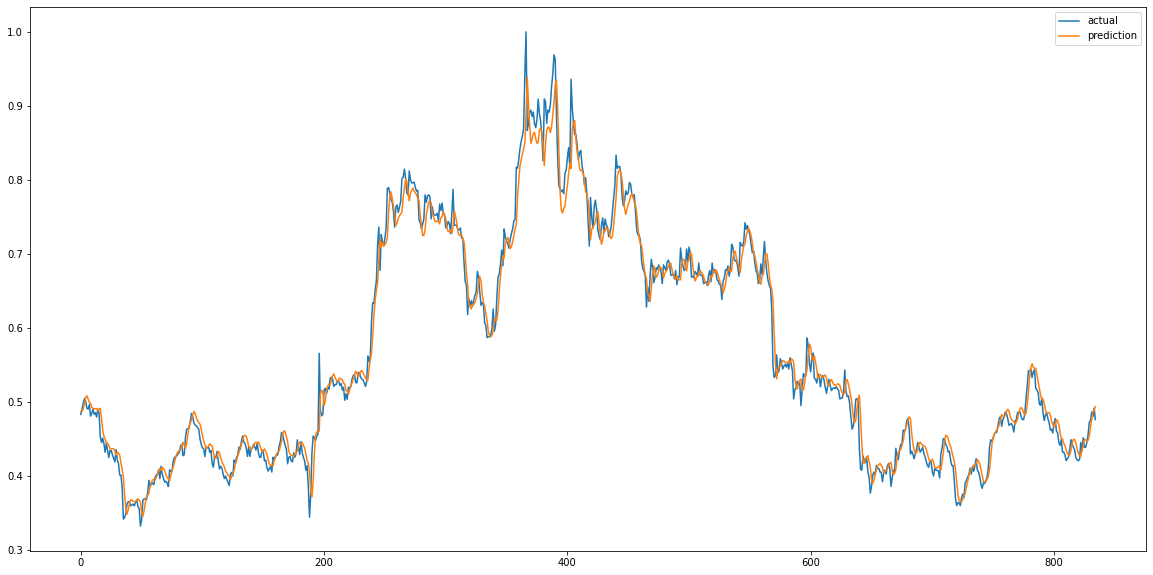

In [53]:
plt.figure(figsize=(20,10))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pre,label='prediction')
plt.legend()
plt.show()